#  Assignment #3.

I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Beatrice Spinola

CWID: 20012606

Date: 04/03/2023

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks and write a proper explanation for your answers. If you want to improve your homework, you can resubmit it until the deadline.

You should submit these UNCOMPRESSED files: 1). A report as a Jupyter notebook (extension ipynb) organized by questions, with the proper explanation for every answer (50% penalty for missing this file),

2). the same Jupyter notebook saved as an HTML or pdf file (it might be easier to generate an HTML file than a pdf file; 20% penalty for missing this file).

From the file menu of the Jupyter notebook, you can download the Jupyter notebook and the same report as a HTML or pdf file: File --> Download as:

# Problem
You are part of the risk management team of a FinTech company dedicated to offering personal loans. The CEO tells you that you should propose a new methodology to calculate the probability of default of their customer base.
The probability of default is defined as the likelihood that a customer will not pay his/her debt obligations over a specified period. 

The dataset default1 includes the following variables:
Gender;  (1 = male; 2 = female).
Training (1 = graduate school; 2 = university; 3 = high school; 4 = others; 0, 5, 6 are other independent categories without labels)
Marital Status (0 = unavailable data; 1 = married; 2 = single; 3 = others).
Age (year).


Each record has the following variables PayStatus1…PayStatus6, Bill1…Bill6, and Payment1…Payment6:
PayStatus# indicates the payment status of the # month lag. Any positive number is the # of months that the payment has been delayed. Any negative value indicates the # of months that the payment was sent in advance. 0 if the payment was sent on time.

Bill#: total amount due in # month lag
Payment#: payment submitted in # month lag.
Default: 1 indicates that the customer defaults (does not pay) the payment of next month, and 0 shows that the customer pays on time.

## Questions:
## Use CART, Boosting, Random Forests, Adaboost, and Support Vector Machine to forecast the customers that default their obligations and calculate their probability of default.
## 1.	Transform the categorical variables into dummy variables. A dummy variable is a binary variable taking the value of one for a particular value of a categorical variable, and the rest is zero. If the categorical variable has k classes, it is necessary to generate k-1 dummy variables as one class is determined when all the other dummy variables are zero.

In [20]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

In [2]:
# Reading the csv file
df = pd.read_csv(r'C:\Users\beasp\Downloads\default1.csv')[["ID", "creditBalance", "Gender", "Training", "MaritalStatus", "Age", "payStatus6", "payStatus5", "payStatus4", "payStatus3", "payStatus2", "payStatus1", "bill6", "bill5", "bill4", "bill3", "bill2", "bill1", "payment6", "payment5", "payment4", "payment3", "payment2", "payment1", "Default"]].dropna()

In [3]:
df.head()

,ID,creditBalance,Gender,Training,MaritalStatus,Age,payStatus6,payStatus5,payStatus4,payStatus3,...,bill3,bill2,bill1,payment6,payment5,payment4,payment3,payment2,payment1,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# transform the categorical variable into dummy variables
df = pd.get_dummies(df, columns=["Gender", "Training", "MaritalStatus"], drop_first=True)

# print the resulting dataset
print(df.columns)

Index(['ID', 'creditBalance', 'Age', 'payStatus6', 'payStatus5', 'payStatus4',
       'payStatus3', 'payStatus2', 'payStatus1', 'bill6', 'bill5', 'bill4',
       'bill3', 'bill2', 'bill1', 'payment6', 'payment5', 'payment4',
       'payment3', 'payment2', 'payment1', 'Default', 'Gender_2', 'Training_1',
       'Training_2', 'Training_3', 'Training_4', 'Training_5', 'Training_6',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3'],
      dtype='object')


## 2. Split the data into training (75%) and test (25%) dataset. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   creditBalance    30000 non-null  int64
 2   Age              30000 non-null  int64
 3   payStatus6       30000 non-null  int64
 4   payStatus5       30000 non-null  int64
 5   payStatus4       30000 non-null  int64
 6   payStatus3       30000 non-null  int64
 7   payStatus2       30000 non-null  int64
 8   payStatus1       30000 non-null  int64
 9   bill6            30000 non-null  int64
 10  bill5            30000 non-null  int64
 11  bill4            30000 non-null  int64
 12  bill3            30000 non-null  int64
 13  bill2            30000 non-null  int64
 14  bill1            30000 non-null  int64
 15  payment6         30000 non-null  int64
 16  payment5         30000 non-null  int64
 17  payment4         30000 non-null  int64
 18  paymen

In [6]:
# split the data into training and test datasets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Define X_train and y_train
X_train = train_df.drop('Default', axis=1)
y_train = train_df['Default']

# Define X_test and y_test
X_test = test_df.drop('Default', axis=1)
y_test = test_df['Default']

In [7]:
X_train

,ID,creditBalance,Age,payStatus6,payStatus5,payStatus4,payStatus3,payStatus2,payStatus1,bill6,...,Gender_2,Training_1,Training_2,Training_3,Training_4,Training_5,Training_6,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3
21177,21178,300000,31,0,0,0,0,0,0,80928,...,0,0,0,1,0,0,0,0,1,0
23942,23943,20000,24,0,0,0,0,0,0,15730,...,0,0,1,0,0,0,0,0,1,0
1247,1248,90000,35,-1,-1,-1,-2,-2,-2,2667,...,1,0,1,0,0,0,0,0,1,0
23622,23623,300000,40,1,-2,-2,-2,-2,-2,0,...,1,0,1,0,0,0,0,1,0,0
28454,28455,70000,36,0,0,0,0,0,0,68028,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,32,0,0,0,0,0,0,52475,...,0,0,1,0,0,0,0,0,1,0
5390,5391,200000,37,2,2,2,2,2,2,157131,...,0,1,0,0,0,0,0,0,1,0
860,861,50000,26,-2,-2,-2,-2,-2,-2,0,...,0,1,0,0,0,0,0,0,1,0
15795,15796,70000,25,0,0,0,0,2,2,73939,...,1,0,1,0,0,0,0,0,1,0


In [8]:
X_test

,ID,creditBalance,Age,payStatus6,payStatus5,payStatus4,payStatus3,payStatus2,payStatus1,bill6,...,Gender_2,Training_1,Training_2,Training_3,Training_4,Training_5,Training_6,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3
2308,2309,30000,25,0,0,0,0,0,0,8864,...,0,0,1,0,0,0,0,0,1,0
22404,22405,150000,26,0,0,0,0,0,0,136736,...,1,1,0,0,0,0,0,0,1,0
23397,23398,70000,32,0,0,0,0,0,0,70122,...,1,0,0,1,0,0,0,1,0,0
25058,25059,130000,49,0,0,0,0,0,-1,20678,...,0,0,0,1,0,0,0,0,1,0
2664,2665,50000,36,0,0,0,0,0,2,94228,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,3212,40000,49,1,-2,-2,-2,-2,-1,0,...,1,0,0,1,0,0,0,1,0,0
9355,9356,330000,42,0,0,0,0,0,0,18516,...,1,0,1,0,0,0,0,1,0,0
28201,28202,300000,48,1,3,2,-1,0,-1,-2,...,1,0,0,1,0,0,0,0,1,0
19705,19706,100000,47,-1,-1,-1,-1,-1,-2,6666,...,1,0,1,0,0,0,0,1,0,0


## 3. Standardize the dataset:  rescale the data as if each feature is normally distributed (Gaussian with zero mean and unit variance), You do not have to do this for the dummy or categorical variables.

In [9]:
df.columns

Index(['ID', 'creditBalance', 'Age', 'payStatus6', 'payStatus5', 'payStatus4',
       'payStatus3', 'payStatus2', 'payStatus1', 'bill6', 'bill5', 'bill4',
       'bill3', 'bill2', 'bill1', 'payment6', 'payment5', 'payment4',
       'payment3', 'payment2', 'payment1', 'Default', 'Gender_2', 'Training_1',
       'Training_2', 'Training_3', 'Training_4', 'Training_5', 'Training_6',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
numerical_cols = ['ID', 'creditBalance', 'Age', 'payStatus6', 'payStatus5', 'payStatus4',
       'payStatus3', 'payStatus2', 'payStatus1', 'bill6', 'bill5', 'bill4', 'bill3', 'bill2', 'bill1',
                  'payment6', 'payment5', 'payment4', 'payment3', 'payment2', 'payment1']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numerical_cols])

# Transform the training and test data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_test

,ID,creditBalance,Age,payStatus6,payStatus5,payStatus4,payStatus3,payStatus2,payStatus1,bill6,...,Gender_2,Training_1,Training_2,Training_3,Training_4,Training_5,Training_6,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3
2308,-1.465457,-1.060788,-1.137657,0.015116,0.112192,0.143537,0.191021,0.235380,0.252108,-0.573114,...,0,0,1,0,0,0,0,0,1,0
22404,0.852482,-0.134371,-1.029331,0.015116,0.112192,0.143537,0.191021,0.235380,0.252108,1.173165,...,1,1,0,0,0,0,0,0,1,0
23397,0.967018,-0.751982,-0.379373,0.015116,0.112192,0.143537,0.191021,0.235380,0.252108,0.263453,...,1,0,0,1,0,0,0,1,0,0
25058,1.158603,-0.288774,1.462174,0.015116,0.112192,0.143537,0.191021,0.235380,-0.613779,-0.411777,...,0,0,0,1,0,0,0,0,1,0
2664,-1.424395,-0.906385,0.053932,0.015116,0.112192,0.143537,0.191021,0.235380,1.983880,0.592656,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,-1.361302,-0.983586,1.462174,0.903102,-1.560651,-1.535038,-1.520637,-1.528204,-0.613779,-0.694165,...,1,0,0,1,0,0,0,1,0,0
9355,-0.652633,1.255253,0.703890,0.015116,0.112192,0.143537,0.191021,0.235380,0.252108,-0.441302,...,1,0,1,0,0,0,0,1,0,0
28201,1.521127,1.023649,1.353848,0.903102,2.621457,1.822112,-0.664808,0.235380,-0.613779,-0.694193,...,1,0,0,1,0,0,0,0,1,0
19705,0.541170,-0.520378,1.245521,-0.872871,-0.724230,-0.695751,-0.664808,-0.646412,-1.479665,-0.603131,...,1,0,1,0,0,0,0,1,0,0


## 4.	Using cross-validation with 10 folds of the training dataset, calibrate the models selecting the optimal values for at least one parameter of each model. Report the optimal parameters selected.

In [30]:
#10-fold cross-validation for the training set
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {}
best_mean = 99999999
best_model = None

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,12):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")

    # Let's tell the model what is the data
    model = decision_tree.fit(X_train, y_train)
    decision_tree.score(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    mean_score = np.mean(np.abs(scores))
    
    if mean_score < best_mean:
        best_model = model
        best_mean = mean_score

models["Decision Tree"] = best_model
print(np.mean(np.abs(scores)))
# max_depth paramiter was optimized and found best MSE score when max-depth = 2

Degree 10, MSE: 0.2026666666666667, STD: 0.01994659536529146
Degree 10, MSE: 0.18039999999999998, STD: 0.007424883089240454
Degree 10, MSE: 0.1816, STD: 0.009058820134113616
Degree 10, MSE: 0.1812, STD: 0.007016171795692195
Degree 10, MSE: 0.18373333333333336, STD: 0.008860398787112611
Degree 10, MSE: 0.18826666666666667, STD: 0.006819579654690358
Degree 10, MSE: 0.18773333333333334, STD: 0.009461970666245424
Degree 10, MSE: 0.1948, STD: 0.00995009771029634
Degree 10, MSE: 0.19853333333333334, STD: 0.01155393150980796
Degree 10, MSE: 0.20293333333333333, STD: 0.00936755630413349
Degree 10, MSE: 0.20879999999999996, STD: 0.008266666666666667
0.20879999999999996


In [31]:
#10-fold cross-validation for the training set
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

best_mean = 99999999
best_model = None

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,4):
    G_Boost = GradientBoostingClassifier(max_depth=i)

    # Let's tell the model what is the data
    model = G_Boost.fit(X_train, y_train)
    G_Boost.score(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    mean_score = np.mean(np.abs(scores))
    
    if mean_score < best_mean:
        best_model = model
        best_mean = mean_score

models["Gradient Boost"] = best_model
print(np.mean(np.abs(scores)))
# max_depth paramiter was optimized and found best MSE score when max-depth = 4

Degree 10, MSE: 0.18133333333333332, STD: 0.009521904571390469
Degree 10, MSE: 0.1812, STD: 0.00831491297475673
Degree 10, MSE: 0.18133333333333332, STD: 0.008844332774281068
0.18133333333333332


In [32]:
#10-fold cross-validation for the training set
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

best_mean = 99999999
best_model = None

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(2,7):
    Rand_Forest = RandomForestClassifier(min_samples_split=i)

    # Let's tell the model what is the data
    model = Rand_Forest.fit(X_train, y_train)
    Rand_Forest.score(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    mean_score = np.mean(np.abs(scores))
    
    if mean_score < best_mean:
        best_model = model
        best_mean = mean_score

models["Random Forest"] = best_model
print(np.mean(np.abs(scores)))
# min_samples_split paramiter was optimized and found best MSE score when min_samples_split = 7

Degree 10, MSE: 0.1877333333333333, STD: 0.01337061454583645
Degree 10, MSE: 0.1896, STD: 0.012115004471040582
Degree 10, MSE: 0.18666666666666668, STD: 0.010616548926610342
Degree 10, MSE: 0.18626666666666666, STD: 0.010499523798725355
Degree 10, MSE: 0.1866666666666667, STD: 0.013610453498853169
0.1866666666666667


In [33]:
#10-fold cross-validation for the training set
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

best_mean = 99999999
best_model = None

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

learning_rates = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]

for i in learning_rates:
    Ada_Boost = AdaBoostClassifier(learning_rate=i)

    # Let's tell the model what is the data
    model = Ada_Boost.fit(X_train, y_train)
    Ada_Boost.score(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    mean_score = np.mean(np.abs(scores))
    
    if mean_score < best_mean:
        best_model = model
        best_mean = mean_score

models["Ada Boost"] = best_model
print(np.mean(np.abs(scores)))
# learning_rate paramiter was optimized and found best MSE score when learning_rate = 1.5

Degree 10, MSE: 0.18266666666666667, STD: 0.010498677165349081
Degree 10, MSE: 0.18119999999999997, STD: 0.008588364221433555
Degree 10, MSE: 0.18173333333333336, STD: 0.010397435581270348
Degree 10, MSE: 0.18773333333333334, STD: 0.012618152708609042
Degree 10, MSE: 0.188, STD: 0.011684747893443542
Degree 10, MSE: 0.18853333333333333, STD: 0.012179399729780521
0.18853333333333333


In [34]:
#10-fold cross-validation for the training set
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

best_mean = 99999999
best_model = None

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    SVM_classifier = SVC(kernel=i, probability=True)

    # Let's tell the model what is the data
    model = SVM_classifier.fit(X_train, y_train)
    SVM_classifier.score(X_train, y_train)
    scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    mean_score = np.mean(np.abs(scores))
    
    if mean_score < best_mean:
        best_model = model
        best_mean = mean_score

models["Support Vector Machine"] = best_model
print(np.mean(np.abs(scores)))
# Kernel paramiter was optimized and found best MSE score when kernel = sigmoid

Degree 10, MSE: 0.21679999999999996, STD: 0.015517158961041232
Degree 10, MSE: 0.19613333333333333, STD: 0.009303762679690405
Degree 10, MSE: 0.1844, STD: 0.009063725012990579
Degree 10, MSE: 0.2853333333333333, STD: 0.012761051854939094
0.2853333333333333


## 5. Rank the features’  importance using Random Forest.

In [35]:
models

{'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=2),
 'Gradient Boost': GradientBoostingClassifier(max_depth=2),
 'Random Forest': RandomForestClassifier(min_samples_split=5),
 'Ada Boost': AdaBoostClassifier(learning_rate=0.7),
 'Support Vector Machine': SVC(probability=True)}

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

            Feature  Importance
3        payStatus6    0.362341
4        payStatus5    0.151058
5        payStatus4    0.103072
6        payStatus3    0.084782
7        payStatus2    0.063612
8        payStatus1    0.050188
15         payment6    0.029696
1     creditBalance    0.022799
16         payment5    0.020723
17         payment4    0.015963
18         payment3    0.013645
20         payment1    0.011753
9             bill6    0.009974
12            bill3    0.008736
19         payment2    0.008255
11            bill4    0.008236
10            bill5    0.008192
13            bill2    0.007951
14            bill1    0.006293
0                ID    0.004457
2               Age    0.003818
26       Training_5    0.001288
22       Training_1    0.000903
28  MaritalStatus_1    0.000717
29  MaritalStatus_2    0.000415
24       Training_3    0.000309
21         Gender_2    0.000306
30  MaritalStatus_3    0.000283
23       Training_2    0.000219
27       Training_6    0.000017
25      

## 6.	Compare the Matthews Correlation Coefficient, the test error, and the average probability of default for the test sample using all the models.

In [37]:
# Import necessary libraries
from sklearn.metrics import matthews_corrcoef, accuracy_score
import numpy as np

# Define a function to calculate average probability of default
def avg_prob_default(y_prob):
    return np.mean(y_prob[:, 1])

# Define empty dictionaries to store results
mcc_results = {}
test_error = {}
avg_prob_default_results = {}

# Evaluate Matthews Correlation Coefficient, test error, and average probability of default for each model
for model_name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_results[model_name] = mcc
    
    # Calculate test error
    error = 1 - accuracy_score(y_test, y_pred)
    test_error[model_name] = error
    
    # Calculate average probability of default
    avg_prob = avg_prob_default(y_prob)
    avg_prob_default_results[model_name] = avg_prob
    
# Print results
performance = pd.DataFrame({'MCC': mcc_results, 'Test Error': test_error, 'Avg Prob Default': avg_prob_default_results})
print(performance)

                             MCC  Test Error  Avg Prob Default
Decision Tree           0.376828    0.180400          0.221098
Gradient Boost          0.390998    0.179467          0.221011
Random Forest           0.383624    0.182667          0.231547
Ada Boost               0.366684    0.182933          0.489108
Support Vector Machine  0.373061    0.182533          0.220721


## 7. Select the best model and create a histogram with 10 bins for the probability of default.

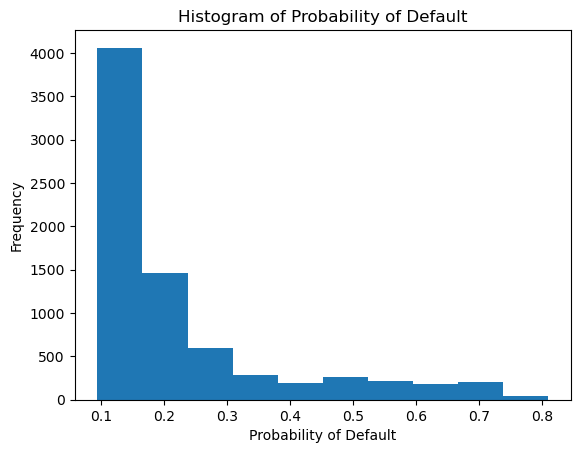

In [21]:
# Predict probability of default for test data using random forest model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Plot histogram of predicted probabilities
plt.hist(y_pred_proba, bins=10)
plt.xlabel('Probability of Default')
plt.ylabel('Frequency')
plt.title('Histogram of Probability of Default')
plt.show()

## 8.	Calculate credit score for each customer using the following formula:
### scores = log(odds)*(40/log(2)) + 340
### where log is natural log; p =probability of default  and odds = (1 - p) / p

In [22]:
# Calculate the probability of default for each customer using the trained random forest model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate the odds for each customer
odds = (1 - y_pred_proba) / y_pred_proba

# Calculate the credit score for each customer
scores = np.log(odds) * (40 / np.log(2)) + 340

print(scores)

[436.27963366 465.57730411 454.30156392 ... 376.08967999 434.1388499
 426.42650761]


## 9.	Create a histogram with 10 bins for the credit scores.

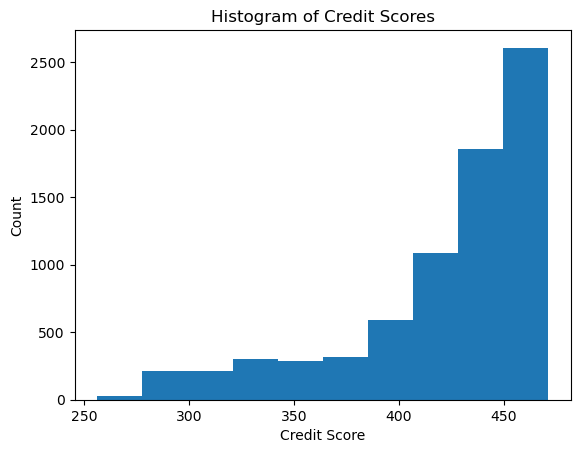

In [23]:
# Create a histogram with 10 bins for the credit scores
plt.hist(scores, bins=10)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Histogram of Credit Scores')
plt.show()

## 10.	Discuss your results explaining the performance measure obtained and the average of the probability of default.

With the performance measure we calculated Matthews Correlation Coefficient, Test Error, and Average Probability of Default for each model. Gradient Boost had the highest MCC score and the lowest test error, therefore it is the best model we obtained. Furthermore, from the Histogram of Probability of Deafault, the majority of the people are likely to repay their loan on time. And from the Histogram of Credit Score, we note that the majority of the population has a credit score between 400 and 500.

### Note 1: Matthews correlation coefficient measures the quality of binary and multiclass classifications. It can be used even if the classes are of very different sizes. This is a correlation coefficient value between -1 (perfect prediction), 0 (average random prediction) and -1 (inverse prediction). 

### Note 2: For many years Fair Isaac Corporation https://www.fico.com/ has provided credit scores for the US market and it has become the standard in the industry. The score goes from 300 (worst score) to 850 (best). The score calculation is proprietary and depends on many demographic and financial factors of the client.

### The credit score formula (log(odds)*(40/log(2)) + 340) does not represent the FICO score. It should go from 340 with a default probability of 340 to about 870 (default probability = 0.0001). 340 is the minimum score because if somebody has a default probability above 50% is already considered a default case, then there is no reason to offer a score.

### If you use 0 and 1 default probabilities, then you do not have a good solution. You can use 0.0001 and 0.99 as rough approximations in which case your scale goes from 75 to 871. So, you can substitute 0 and 1s by these approximate numbers to generate the histogram. However, you can interpret the histogram assuming that anything below and above 340 and 850 are extreme values.